# MACHINE LEARNING FOR CONDOMINIUM
<hr>

In [1]:
# Import Libraries for Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Import Data

In [2]:
df_condominium = pd.read_csv('DF_Condominium.csv')
df_condominium

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT,SALEYEAR,SALEMONTH
0,106696,2,0,Forced Air,Y,4,2,1911.0,1,1919,...,1084.0,20010.0,38.933606,-77.021312,Columbia Heights,Ward 1,3037,NW,2016.0,12.0
1,106698,2,0,Forced Air,Y,4,2,1911.0,1,1919,...,1267.0,20010.0,38.933606,-77.021312,Columbia Heights,Ward 1,3037,NW,2017.0,2.0
2,106699,2,0,Forced Air,Y,4,2,1911.0,1,1919,...,1151.0,20010.0,38.933606,-77.021312,Columbia Heights,Ward 1,3037,NW,2016.0,12.0
3,106700,2,0,Forced Air,Y,4,2,1911.0,1,1919,...,1080.0,20010.0,38.933606,-77.021312,Columbia Heights,Ward 1,3037,NW,2016.0,12.0
4,106701,2,0,Forced Air,Y,4,2,1911.0,1,1919,...,1405.0,20010.0,38.933606,-77.021312,Columbia Heights,Ward 1,3037,NW,2017.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,158949,1,1,Forced Air,Y,4,1,1938.0,1,1938,...,1123.0,20001.0,38.911840,-77.019420,Old City 2,Ward 6,477,NW,2015.0,6.0
18479,158950,3,0,Forced Air,Y,5,3,1938.0,1,1938,...,1330.0,20001.0,38.911840,-77.019420,Old City 2,Ward 6,477,NW,2015.0,12.0
18480,158952,1,0,Forced Air,Y,3,1,1938.0,1,1938,...,639.0,20001.0,38.911840,-77.019420,Old City 2,Ward 6,477,NW,2015.0,4.0
18481,158953,1,0,Forced Air,Y,4,2,1938.0,1,1938,...,820.0,20001.0,38.911840,-77.019420,Old City 2,Ward 6,477,NW,2013.0,10.0


### Attribute Feature

In [3]:
def unival (dataset):
    col=dataset.columns
    col_name=[]
    n_unique=[]
    unique_val=[]
    for i in col:
        col_name.append(i)
        n_unique.append(dataset[i].nunique())
        unique_val.append(dataset[i].unique())
    dfr=pd.DataFrame({'col_name':col_name,'n_unique':n_unique,'unique_val':unique_val})
    return dfr
unival(df_condominium)

,col_name,n_unique,unique_val
0,Unnamed: 0,18483,"[106696, 106698, 106699, 106700, 106701, 10670..."
1,BATHRM,6,"[2, 1, 3, 0, 4, 5]"
2,HF_BATHRM,4,"[0, 1, 2, 3]"
3,HEAT,14,"[Forced Air, Warm Cool, Ht Pump, Water Base Br..."
4,AC,2,"[Y, N]"
5,ROOMS,10,"[4, 3, 2, 5, 6, 7, 8, 1, 9, 10]"
6,BEDRM,6,"[2, 1, 0, 3, 4, 5]"
7,AYB,145,"[1911.0, 2007.0, 1937.0, 2004.0, 1967.0, 1954...."
8,YR_RMDL,2,"[1, 0]"
9,EYB,129,"[1919, 2007, 1937, 2004, 1967, 1954, 1949, 194..."


## FEATURE ENGINEERING

#### Membatasi data yang akan dipakai dalam pemodelan

Pada dataset kondominium terdapat fitur QUALIFIED, dimana merupakan indikator yang mencerminkan apakah suatu penjualan representatif terhadap nilai pasar. Fitur QUALIFIED memiliki value 'Q' untuk *qualified* dan 'U' untuk 'unqualified'. Dalam pemodelan, data yang digunakan adalah data penjualan yang memiliki fitur QUALIFIED 'Q' agar hasil prediksi harga nantinya representatif terhadap nilai pasar.

In [4]:
df_condominium = df_condominium[df_condominium['QUALIFIED']== 'Q']

#### Menghapus fitur yang tidak dipakai dalam pemodelan

Beberapa fitur yang akan dihapus dan tidak akan digunakan dalam pemodelan : 
* Unnamed: 0 : Hanya berisikan penomoran data
* SALEYEAR : Tahun penjualan terakhir
* BLDG_NUM, SOURCE, QUALIFIED : Hanya memiliki 1 nilai unik
* EYB : Tahun *improvement* bangunan
* USECODE : Berupa kode khusus pada properti
* ZIPCODE : Berupa kode khusus pos
* SQUARE, QUADRANT, LATITUDE, LONGITUDE : Berupa lokasi yang sudah diwakili oleh fitur ASSESSMENT_NBHD dan WARD

In [5]:
df_condominium.drop(columns=['Unnamed: 0', 'SALEYEAR', 'BLDG_NUM', 'EYB', 'USECODE', 'CMPLX_NUM', 'ZIPCODE', 'SQUARE', 'SOURCE', 'QUALIFIED', 'QUADRANT', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

C:\Users\Bariza Haqi\AppData\Local\Temp\ipykernel_22720\2365093868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condominium.drop(columns=['Unnamed: 0', 'SALEYEAR', 'BLDG_NUM', 'EYB', 'USECODE', 'CMPLX_NUM', 'ZIPCODE', 'SQUARE', 'SOURCE', 'QUALIFIED', 'QUADRANT', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)


#### Encoding dan Scaling

Sebelum melakukan splitting data, fitur kategorikal dalam dataset akan diubah terlebih dahulu menjadi numerik menggunakan one hot encoding dan binary encoding. Selain itu, untuk fitur numerikal akan dilakukan scaling menggunakan standard scaler untuk normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang sangat besar.

In [6]:
# variabel kategorik untuk dilakukan one hot encoding
one_hot_var = ['AC']

# variabel kategorik untuk dilakukan binary encoding
binary_var = ['HEAT', 'ASSESSMENT_NBHD', 'WARD', 'SALEMONTH', 'BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'SALE_NUM', 'FIREPLACES']

# variabel numerik untuk di scalling menggunakan standard scaler
scaling_var = ['LANDAREA', 'LIVING_GBA']

# variabel berisikan pipeline untuk one hot encoding
one_hot_encoding = Pipeline([('encoding_onehotencoding',OneHotEncoder(drop='first', handle_unknown='ignore'))])

# variabel berisikan pipeline untuk binary encoding
binary_encoding = Pipeline([('encoding_binaryencoding',ce.BinaryEncoder(cols=None))])

# variabel berisikan pipeline untuk scaling
scaling = Pipeline(steps=[('scaling',StandardScaler(with_mean=False))])

# Menggabungkan pipeline encoding dan pipeline scaling
transformer = ColumnTransformer([
        ('transformation_one_hot', one_hot_encoding, one_hot_var),
        ('transformation_binary', binary_encoding, binary_var),
        ('transformation_numerical', scaling, scaling_var)],remainder='passthrough')

#### Data Splitting

In [7]:
# Memisahkan data independen variabel dengan target
x = df_condominium.drop(['PRICE'], axis=1)
y = df_condominium['PRICE']

#### Train and Test Splitting

In [8]:
# Splitting data training dan test dengan proporsi 70:30
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,  
    test_size=0.3,
    random_state=2020)

In [9]:
# Define algoritma yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)

In [10]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

In [11]:
# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]


# Menyimpan nilai MAE
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

# Menyimpan nilai MAPE
score_mape = []
nilai_mean_mape = []
nilai_std_mape = []


# Mencari algoritma terbaik dalam tahap train
for i in models:
    
    # Mengevaluasi performa model
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020) 


    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())


    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error',  
        error_score='raise' 
        ) 

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise' 
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-126725.51611681 -112443.11080068 -125563.64365878 -127367.85738698
 -127959.98683647] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-83513.13849669 -77687.41448707 -81148.95677031 -87339.75806237
 -84808.06401236] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.2137671  -0.18640299 -0.19984759 -0.21682038 -0.20257536] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-105785.00957706 -108305.38191032 -106624.30310214 -105162.86433415
 -107818.82709313] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-72668.05440098 -70976.43923982 -71991.29583955 -71070.95855337
 -72159.23043699] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufun

In [12]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-124012.022960,5838.807137,-82899.466366,3285.279210,-0.203883,0.010850
1,KNN Regressor,-106739.277203,1185.498646,-71773.195694,651.969394,-0.184382,0.005312
2,DecisionTree Regressor,-103355.042706,2566.640196,-65247.505197,797.805193,-0.152747,0.004645
3,RandomForest Regressor,-75154.398061,1474.837548,-48371.157569,959.227982,-0.114099,0.003921
4,XGBoost Regressor,-72586.457705,893.060322,-47658.501748,558.230496,-0.111395,0.002887


Berdasarkan evaluasi hasil dari lima model yang diuji, dilihat dari nilai RMSE, MAE, dan MAPE yang paling kecil, XGBoost adalah model terbaik. Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu XGBoost. 

In [13]:
# Benchmark model terbaik
models = {
    'Xgboost' : XGBRegressor(random_state=2020)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse,'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Xgboost,73111.841574,48625.525448,0.113649


Setelah dilakukan prediksi pada data testing, XGBoost memiliki nilai RMSE, MAE, dan MAPE yang cukup kecil. XGBoost akan dipilih sebagai model akhir dan akan dilakukan Hyperparameter Tuning untuk meningkatkan performanya.

#### Hyperparameter Tuning

In [14]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

## Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


## Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [15]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2020, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

# Hyperparameter tuning
parameter_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 2020
)

In [16]:
# Fitting data training untuk mencari parameter terbaik
parameter_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('transformation_one_hot',
                                                                               Pipeline(steps=[('encoding_onehotencoding',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['AC']),
                                                                              ('transformation_binary',
                                                                               Pipeline(steps=[('encod...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2020, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [17]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE, dan MAPE
pd.DataFrame(parameter_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
24,3.591400,0.012643,0.037002,0.002828,0.7,3.593814,138,10,0.07,8,...,1012.802898,1,-0.120085,-0.104571,-0.108772,-0.117158,-0.110600,-0.112237,0.005644,1
31,2.279200,0.015522,0.030400,0.001855,0.6,0.464159,135,7,0.15,5,...,898.674954,2,-0.125711,-0.109944,-0.113504,-0.120829,-0.115398,-0.117077,0.005569,2
12,1.574399,0.017106,0.032599,0.006375,0.9,0.059948,155,5,0.14,5,...,1282.409161,4,-0.129835,-0.114125,-0.117069,-0.125341,-0.121197,-0.121513,0.005627,6
29,1.030599,0.010874,0.023998,0.002192,0.9,0.021544,110,5,0.16,4,...,1240.658664,6,-0.133735,-0.117592,-0.121100,-0.128274,-0.121611,-0.124462,0.005782,7
2,2.407158,0.046928,0.036539,0.006032,0.8,0.464159,115,10,0.26,6,...,948.030830,3,-0.126677,-0.110391,-0.118425,-0.121594,-0.117224,-0.118862,0.005351,3


In [18]:
# Cek skor dan params terbaik
print('XGB')
print('Best_score:', parameter_xgb.best_score_)
print('Best_params:', parameter_xgb.best_params_)

XGB
Best_score: -70975.05817380182
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 3.593813663804626, 'model__n_estimators': 138, 'model__max_depth': 10, 'model__learning_rate': 0.07, 'model__gamma': 8, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [19]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = parameter_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai RMSE, MAE, dan MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': score_rmse,'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,73111.841574,46786.894638,0.110898


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [20]:
# Sebelum hyperparameter tuning
score_before_tuning

,RMSE,MAE,MAPE
Xgboost,73111.841574,48625.525448,0.113649


In [21]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,73111.841574,46786.894638,0.110898


Model mengalami peningkatan performa (nilai MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

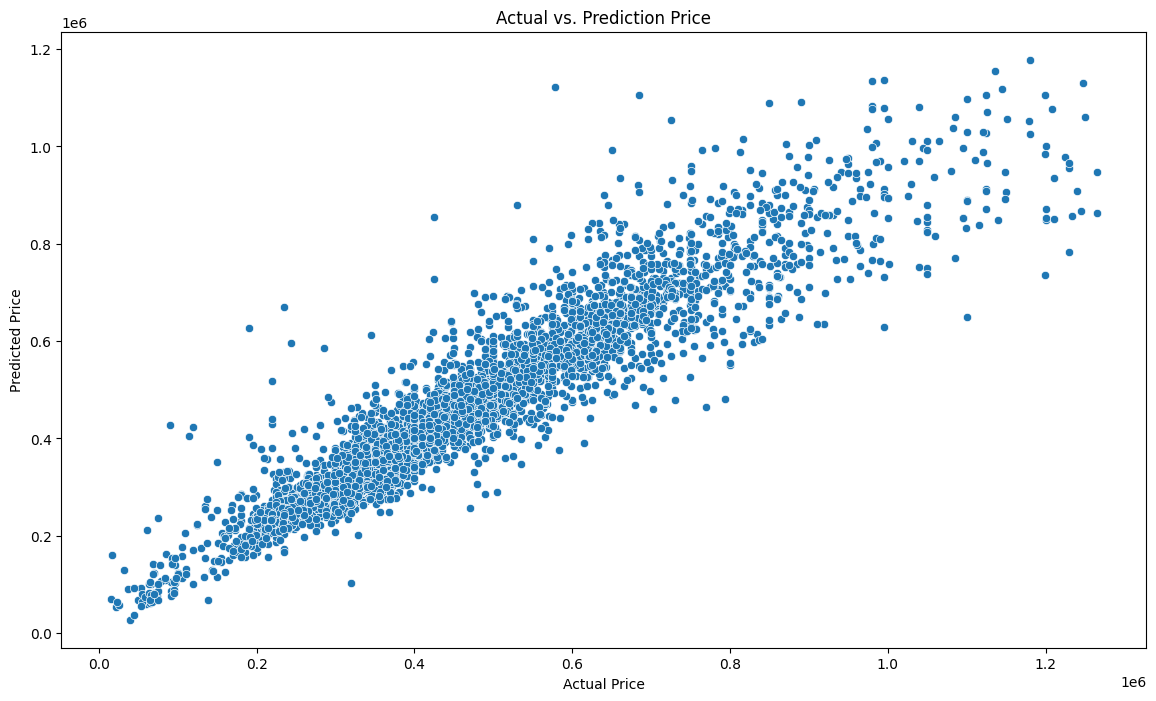

In [22]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Berdasarkan plot di atas dapat dilihat bahwa harga aktual dengan harga yang di prediksi membentuk pola yang linear walaupun masih terdapat error seperti harga aktual yang rendah namun diprediksi harga tinggi dan sebaliknya.

#### Feature Importance

<AxesSubplot: title={'center': 'Feature Importances'}>

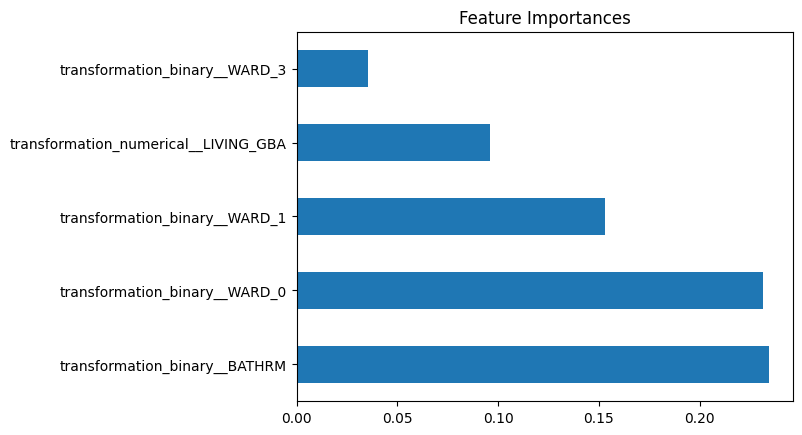

In [23]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

In [24]:
#Saving Model
import pickle


estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('Washington_D.C-Housing-Price-XGB.sav', 'wb'))